In [1]:
import rasterio as rio
from rasterio.plot import plotting_extent
import rasterio.plot
import numpy as np
#from topolib.subsetDat import subsetBBox;
#from topolib import gda_lib;
from pyproj import Proj, transform
from icepyx import icesat2data as ipd
import matplotlib.pyplot as plt 
import sys
from pathlib import Path
import cartopy.crs as ccrs

#%matplotlib inline
%matplotlib widget

In [2]:
!pwd

/home/jovyan/SeasonalSnow/contributors/IsobelLawrence


# Find ICESat2 data within domain near Yellowknife-Henderson weather station
Yellowknife-Henderson weather station is one of the few in the Northwest Territories than records daily snowfall

See: https://climate.weather.gc.ca/climate_data/daily_data_e.html?hlyRange=%7C&dlyRange=2006-07-01%7C2020-05-31&mlyRange=2006-07-01%7C2007-11-01&StationID=45467&Prov=NT&urlExtension=_e.html&searchType=stnProv&optLimit=yearRange&StartYear=2019&EndYear=2020&selRowPerPage=25&Line=71&Month=12&Day=16&lstProvince=NT&timeframe=2&Year=2019

Weather station is at lat/lon: 62°27'00.000"N, 114°23'00.000"W, next to 'Frame Lake'. Let's create bounding box around Frame lake and then search for IS2 ATL03 data

In [3]:
#'LowerLeft_Lon': L,
#'LowerLeft_Lat': B,
#'UpperRight_Lon': R,
#'UpperRight_Lat': T

#cmd+/ to comment out a block of code!

L=-114.4
B=62.446
R=-114.38
T=62.47

# L=-115
# B=62
# R=-113
# T=63

Plot this region

In [4]:
#var= 'heights' #choose which variable we want to plot

## we will want to set colorbar parameters based on the chosen variable
#vmin=-10
#vmax=30
#ticks=np.arange(-20,100,5)


plt.figure(figsize=(8,8), dpi= 90)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-114)) # choose polar sterographic for projection
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
plt.scatter(L,B,s=10,color='red',transform=ccrs.PlateCarree())
#plt.scatter(df03['lons'][::1000], df03['lats'][::1000],c=df03[var][::1000], cmap='plasma', vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree())
#plt.colorbar(label=var, shrink=0.5, ticks=ticks,extend='both')

#rect1 = patches.Rectangle((x1, y1), xwidth, ywidth,linewidth = 1,
#                              edgecolor = 0,  facecolor='none')
#ax = plt.gca()
#    ax.add_patch(rect1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
# Our data folder 
data_home = Path('/home/jovyan/shared/data-Isobel_Rosie/ATL03')
                 
# Create folder if it doesn't exist
data_home.mkdir(exist_ok=True)

In [8]:
!ls -l /home/jovyan/shared/data-Isobel_Rosie/ATL03/*

-rw-r--r-- 1 jovyan jovyan 92477568 Jun 17 10:35 /home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20191008052407_01730502_003_01.h5
-rw-r--r-- 1 jovyan jovyan 70286802 Jun 17 20:12 /home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20200103140535_01200605_003_01.h5
-rw-r--r-- 1 jovyan jovyan 72689069 Jun 17 20:12 /home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20200127003045_04780603_003_01.h5
-rw-r--r-- 1 jovyan jovyan 71211624 Jun 17 20:13 /home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20200201124138_05620605_003_01.h5
-rw-r--r-- 1 jovyan jovyan 72616867 Jun 17 20:12 /home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20200224230645_09200603_003_01.h5
-rw-r--r-- 1 jovyan jovyan 71545760 Jun 17 20:12 /home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20200301111738_10040605_003_01.h5
-rw-r--r-- 1 jovyan jovyan 74838016 Jun 17 20:13 /home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20200328213426_00360703_003_01.h5

In [9]:
short_name = 'ATL03'
spatial_extent = [L,B,R,T]
date_range = ['2019-01-01','2020-06-30']

# spatial_extent = [148, -81, 162, -80]  # Byrd
# date_range = ['2018-10-14','2018-12-22']

region = ipd.Icesat2Data(short_name, spatial_extent, date_range)

In [10]:
print('product:    ', region.dataset)
print('dates:      ', region.dates)
print('start time: ', region.start_time)
print('end time:   ', region.end_time)
print('version:    ', region.dataset_version)
print('extent:     ', region.spatial_extent)

print('\nDATA:')
print('\n'.join([str(item) for item in region.avail_granules().items()]))

region.visualize_spatial_extent()

product:     ATL03
dates:       ['2019-01-01', '2020-06-30']
start time:  00:00:00
end time:    23:59:59
version:     003
extent:      ['bounding box', [-114.4, 62.446, -114.38, 62.47]]

DATA:
('Number of available granules', 29)
('Average size of granules (MB)', 1555.9673577999206)
('Total size of all granules (MB)', 45123.0533761977)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
#build and view the parameters that will be submitted in our query
region.CMRparams

{'short_name': 'ATL03',
 'version': '003',
 'temporal': '2019-01-01T00:00:00Z,2020-06-30T23:59:59Z',
 'bounding_box': '-114.4,62.446,-114.38,62.47'}

In [22]:
#get a list of the available granule IDs that meet your search criteria
region.avail_granules(ids=True)[0:10] 

['ATL03_20190105072628_01200205_003_01.h5',
 'ATL03_20190128175143_04780203_003_01.h5',
 'ATL03_20190203060240_05620205_003_01.h5',
 'ATL03_20190226162745_09200203_003_01.h5',
 'ATL03_20190304043840_10040205_003_01.h5',
 'ATL03_20190331145525_00360303_003_01.h5',
 'ATL03_20190406030620_01200305_003_01.h5',
 'ATL03_20190429133124_04780303_003_01.h5',
 'ATL03_20190505014217_05620305_003_01.h5',
 'ATL03_20190528120721_09200303_003_01.h5']

In [20]:
region.granules.wanted()

AttributeError: 'Granules' object has no attribute 'wanted'

In [26]:
test_file=region.avail_granules(ids=True)[0]
print(test_file)

ATL03_20190105072628_01200205_003_01.h5


In [50]:
for d in weather.date_time:
    print(d)

2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15
2019-03-16
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-29
2019-03-30
2019-03-31
2019-04-01

In [60]:
import pandas as pd
import datetime
import matplotlib.gridspec as gridspec

weather = pd.read_csv('en_climate_daily_NT_2204110_2019_P1D.csv')

weather.columns = [c.strip().lower().replace(' ', '_').replace('/', '_').replace('(','_').replace(')','_').replace('°','') for c in weather.columns]

#print(weather.columns)

w_dt = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in weather.date_time]

# date_str = '29-12-2017' # The date - 29 Dec 2017
# format_str = '%d/%m/%Y' # The format
# datetime_obj = datetime.datetime.strptime(date_str, format_str)
# print(datetime_obj.date())

figsize = (12,9)
fig = plt.figure(figsize=figsize)
gs = gridspec.GridSpec(2, 1, figure=fig)

plt.plot(weather.date_time, weather.total_snow__cm_)
plt.xlabel('date')
plt.ylabel('snowfall (cm)')
#locs, labels = xticks()
plt.xticks(rotation=90,fontsize=6)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
ipd.Icesat2Data.download_granules?


Signature:
ipd.Icesat2Data.download_granules(
    self,
    path,
    verbose=False,
    subset=True,
    restart=False,
    **kwargs,
)
Docstring:
Downloads the data ordered using order_granules.

Parameters
----------
path : string
    String with complete path to desired download location.
verbose : boolean, default False
    Print out all feedback available from the order process.
    Progress information is automatically printed regardless of the value of verbose.
subset : boolean, default True
    Apply subsetting to the data order from the NSIDC, returning only data that meets the
    subset parameters. Spatial and temporal subsetting based on the input parameters happens
    by default when subset=True, but additional subsetting options are available.
    Spatial subsetting returns all data that are within the area of interest (but not complete
    granules. This eliminates false-positive granules returned by the metadata-level search)
restart: boolean, default false
    If pre

In [42]:
polygons = [granule['polygons'] for granule in region.granules.avail]

In [46]:
polygons[0]

[['80.11254119920325 -104.83294460220542 61.18421494056679 -114.62866866670758 59.534481326880396 -114.98987432428096 59.55678611383296 -115.62747567417355 61.20767873724507 -115.29923131320781 80.17859740110205 -106.686020668391 80.11254119920325 -104.83294460220542']]

In [ ]:
region.download_granules[0]

In [ ]:
'2020-02-11'

# Download the data

In [38]:
name = 'isobelrlawrence'
email = 'isobel.lawrence.15@ucl.ac.uk'

# for file in region.avail_granules(ids=True):
#     print(file)

if not list(data_home.glob('*'+test_file+'*')):
    print('you dont have the file')
    region.earthdata_login(name, email)
    region.download_granules[0](data_home)


you dont have the file


KeyboardInterrupt: Interrupted by user

In [16]:
files = list(data_home.glob('*.h5'))

for f in files[:10]: print(f)
print('Total number of files:', len(files))

/home/jovyan/shared/data-Isobel_Rosie/ATL03/processed_ATL03_20191008052407_01730502_003_01.h5
Total number of files: 1


# Plot the ATL03 data 
From land_ice_applications Notebook

In [17]:
# the usual suspects:
import numpy as np
import matplotlib.pyplot as plt

# specialty modules
import h5py
import pyproj

# run matplotlib in 'widget' mode
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [47]:
#from readers.read_HDF5_ATL03 import read_HDF5_ATL03
#from readers.get_ATL03_x_atc import get_ATL03_x_atc

from read_HDF5_ATL03 import read_HDF5_ATL03
from get_ATL03_x_atc import get_ATL03_x_atc

In [28]:
data_root='/home/jovyan/shared/data-aragon/'

In [40]:
import os
import glob

rgt="0615"
cycle="04"
glob.glob(os.path.join(data_root, 'download', f'*{rgt}{cycle}*.h5'))

['/home/jovyan/shared/data-aragon/download/processed_ATL03_20190807082015_06150402_003_01.h5']

In [48]:
read_HDF5_ATL03

<function read_HDF5_ATL03.read_HDF5_ATL03(FILENAME, ATTRIBUTES=True, VERBOSE=False)>

In [49]:
# read the data:
rgt="0615"
cycle="04"
# read the IS2 data with Tyler's ATL03 reader:
ATL03_file=glob.glob(os.path.join(data_root, 'download', f'*{rgt}{cycle}*.h5'))[0]
print(ATL03_file)
IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams =read_HDF5_ATL03(ATL03_file)
# add x_atc to the ATL03 data structure (this function adds to the LS2_ATL03_mds dictionary)
get_ATL03_x_atc(IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams)

/home/jovyan/shared/data-aragon/download/processed_ATL03_20190807082015_06150402_003_01.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

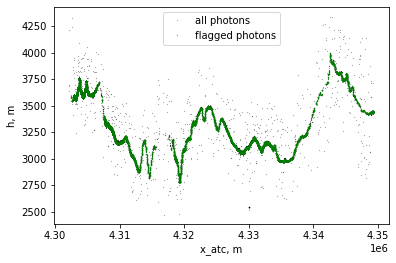

In [50]:
#-- select the beam from ATL03
D3 = IS2_atl03_mds['gt3l']

#-- create scatter plot of photon data (e.g., photon elevation vs x_atc)
fig=plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(D3['heights']['x_atc'], D3['heights']['h_ph'],'k.',markersize=0.25, label='all photons')
LMH=D3['heights']['signal_conf_ph'][:,3] >= 2
ax.plot(D3['heights']['x_atc'][LMH], D3['heights']['h_ph'][LMH],'g.',markersize=0.5, label='flagged photons')
h_leg=ax.legend()

ax.set_xlabel('x_atc, m')
ax.set_ylabel('h, m')
plt.show()